# 章節 8：觀察者偏誤（Observer Bias）

## 8.5 預估乘客到達頻率

到目前為止的分析都是建立在兩個假設上：

1. 班距的分佈
2. 乘客到達的頻率

現在我們要放寬第二的假設。

假設你剛搬到波士頓，所以你不知道紅線乘客的到達頻率。在幾天的通勤後，你至少可以憑感覺猜一下。

多花一些力氣，你可以評估數值化 λ。每天當你抵達月台，你應該記下當時時間跟當時等待乘客的數量（如果月台太大，你可以固定選一個取樣區域）。接著你紀錄你的等待時間，且在你等待的期間到達有多少新乘客到達。經過五天後，你可能有類似下列的資料：

<table border="1">
    <tr><td>k1</td><td>y</td><td>k2</td></tr>
    <tr><td>17</td><td>4.6</td><td>9</td></tr>
    <tr><td>22</td><td>1.0</td><td>0</td></tr>
    <tr><td>23</td><td>1.4</td><td>4</td></tr>
    <tr><td>18</td><td>5.4</td><td>12</td></tr>
    <tr><td>4</td><td>5.8</td><td>11</td></tr>
</table>

- k1：當你一抵達時有多少乘客在月台
- y: 你等待多少分鐘
- k2: 等待期間有多少新乘客抵達

再上過一週課後，你等 18 分鐘看到 36 個乘客到達月台，所以你估計乘客到達頻率為 2 名/分鐘。在實際應用上這個估計已經夠好了，但為了完整性，這邊會計算 λ 的後驗分佈，並且演示如何將其加入後續的分析。

ArrivalRate 代表 λ 的分佈。這邊的 hypo 就是 λ。data 是等待時間 y 和乘客抵達數量 k 的配對。

In [3]:
import thinkbayes as tb
import numpy as np
import matplotlib.pyplot as plt

class ArrivalRate(tb.Suite):
    
    def Likelihood(self, data, hypo):
        lam = hypo
        y, k = data
        like = tb.EvalPoissonPmf(k, lam*y)
        return like

上方的 Likelihood 方法很熟悉；他幾乎跟上小節的 Elasped.Likelihood 方法依樣。除了 Elasped.Likelihood 的 hypo 是經過時間 x；而 ArrivalRate.Likelihood 方法的 hypo 是乘客到達頻率 lam。但是兩者的 Likelihood 都表示在給定 lam 後，一時間區間看到 k 名乘客的機率。

ArrivalRateEstimator 封裝預測 λ 的過程。passenger_data 參數是一序列的 k1, y, k2 的 tuple 來表達上方的資料表格。

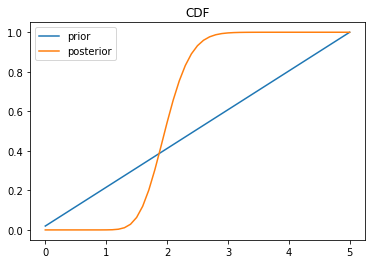

2.0329670328917233

In [18]:
def plot_dist(dist):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y)


class ArrivalRateEstimator(object):
    
    def __init__(self, passenger_data):
        low, high = 0, 5
        n = 51
        
        # lam 用均勻分佈表示 
        hypos = np.linspace(low, high, n)
        
        self.prior_lam = ArrivalRate(hypos)
        
        self.post_lam = self.prior_lam.Copy()
        
        # 用資料更新先驗分佈，產生後驗分佈 post_lam
        for k1, y, k2 in passenger_data:
            self.post_lam.Update((y, k2))

            
data = [
    (17, 4.6, 9),
    (22, 1.0, 0),
    (23, 1.4, 4),
    (18, 5.4, 12),
    (4, 5.8, 11),
]

are = ArrivalRateEstimator(data)
plot_dist(are.prior_lam.MakeCdf())
plot_dist(are.post_lam.MakeCdf())
plt.title("CDF")
plt.legend(["prior", "posterior"])
plt.show()

are.post_lam.MakeCdf().Percentile(0.5)
are.post_lam.Mean()

上圖為 λ 的先驗分佈和後驗分佈的 CDF。如預期，後驗分佈的期望值約 2 名乘客/分鐘。但後驗分佈的擴散性基於小樣本資料捕捉了 λ 的不確定性。

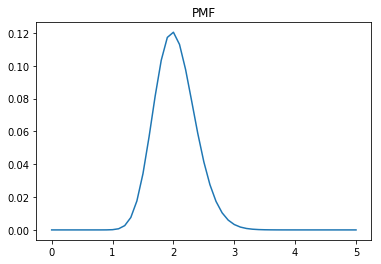

In [19]:
plot_dist(are.post_lam) 
plt.title("PMF")
plt.show()

In [ ]:
上圖為 λ 後驗分佈的 PMF。